In [1]:
from fretboard import FretBoard
from fretboard_utils import draw

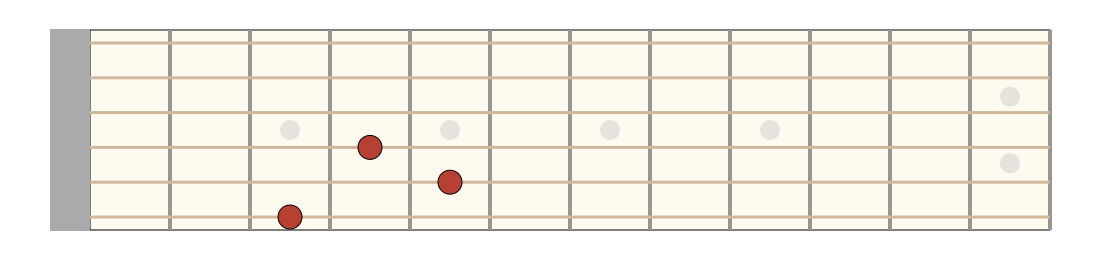

In [2]:
fretboard = FretBoard()
fretboard.add_note(6, 3)
fretboard.add_note(5, 5)
fretboard.add_note(4, 4)

draw(fretboard)